In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_customer_data.csv to cleaned_customer_data.csv


In [ ]:
df = pd.read_csv("cleaned_customer_data.csv")

In [ ]:
features= ["Income", "Recency", "Age", "Children", "TotalSpend"]
X = df[features]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

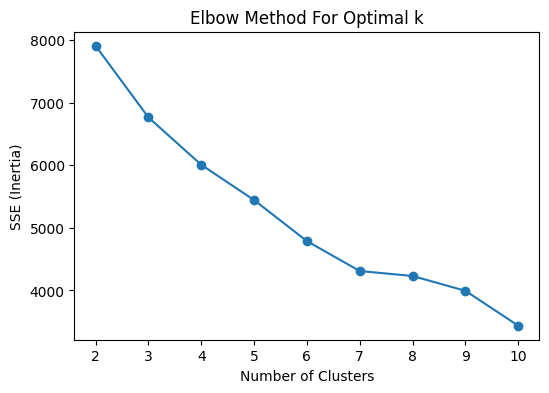

In [ ]:
sse = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)
print("KMeans Silhouette Score:", silhouette_score(X_scaled, df["KMeans_Cluster"]))

KMeans Silhouette Score: 0.21735830885718244


In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)
print("DBSCAN Cluster Counts:\n", df["DBSCAN_Cluster"].value_counts())

DBSCAN Cluster Counts:
 DBSCAN_Cluster
 0    2224
-1      16
Name: count, dtype: int64


In [ ]:
mask = df["DBSCAN_Cluster"] != -1

# Check if there is more than one data point and more than one unique cluster after removing noise
if mask.sum() > 1 and len(df["DBSCAN_Cluster"][mask].unique()) > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(X_scaled[mask], df["DBSCAN_Cluster"][mask]))
else:
    print("DBSCAN produced mostly noise (-1) or only one cluster (excluding noise), cannot compute silhouette score.")

DBSCAN produced mostly noise (-1) or only one cluster (excluding noise), cannot compute silhouette score.


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

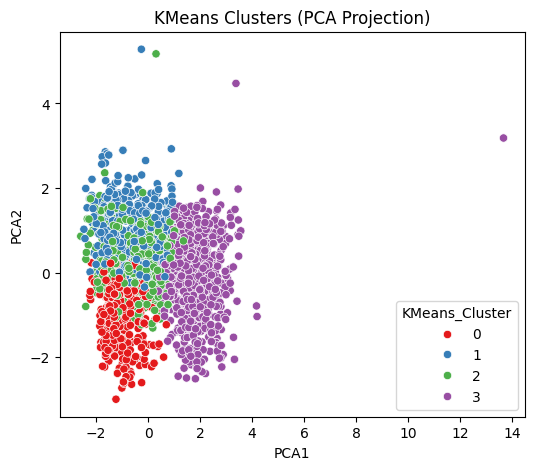

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="KMeans_Cluster", palette="Set1")
plt.title("KMeans Clusters (PCA Projection)")
plt.show()

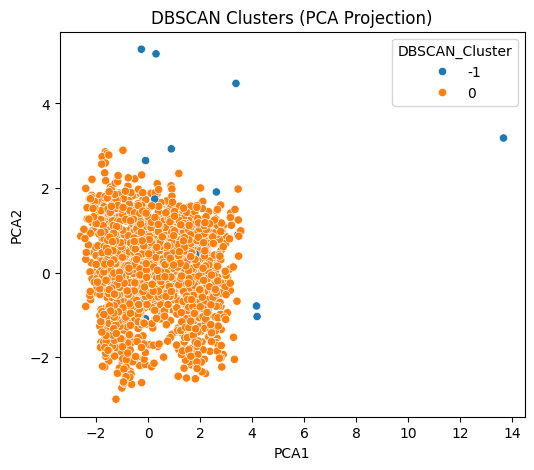

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="DBSCAN_Cluster", palette="tab10")
plt.title("DBSCAN Clusters (PCA Projection)")
plt.show()

In [ ]:
df.to_csv("clustered_customer_data.csv", index=False)
print("Clustered data saved as 'clustered_customer_data.csv'")

Clustered data saved as 'clustered_customer_data.csv'


In [ ]:
from google.colab import files
files.download("clustered_customer_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>